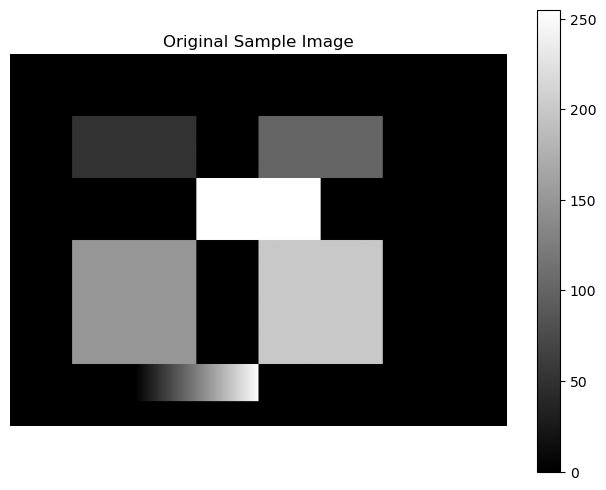

Image shape: (300, 400)
Data type: uint8
Intensity range: [0, 255]


In [14]:
# Create a sample grayscale image with various intensity regions
image = np.zeros((300, 400), dtype=np.uint8)

# Add different intensity regions
image[50:100, 50:150] = 50   # Dark region
image[50:100, 200:300] = 100  # Medium-dark
image[150:250, 50:150] = 150  # Medium
image[150:250, 200:300] = 200 # Medium-bright
image[100:150, 150:250] = 255 # Bright region

# Add some gradient
for i in range(100, 200):
    image[250:280, i] = int((i - 100) * 2.55)

plt.figure(figsize=(8, 6))
plt.imshow(image, cmap='gray')
plt.title('Original Sample Image')
plt.colorbar()
plt.axis('off')
plt.show()

print(f"Image shape: {image.shape}")
print(f"Data type: {image.dtype}")
print(f"Intensity range: [{image.min()}, {image.max()}]")

## Load Sample Image

We'll create synthetic images for demonstration purposes.

In [15]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

# Function to display multiple images
def display_images(images, titles, figsize=(15, 5), cmap='gray'):
    n = len(images)
    fig, axes = plt.subplots(1, n, figsize=figsize)
    if n == 1:
        axes = [axes]
    for ax, img, title in zip(axes, images, titles):
        ax.imshow(img, cmap=cmap)
        ax.set_title(title)
        ax.axis('off')
    plt.tight_layout()
    plt.show()

# Spatial Image Processing with OpenCV

This notebook demonstrates 6 fundamental point processing algorithms commonly used in digital image processing.

## Algorithms Covered:
1. **Image Negative** - Intensity inversion (medical/X-ray imaging)
2. **Log Transformation** - Enhances dark regions
3. **Gamma Correction** - Display correction & brightness adjustment
4. **Contrast Stretching** - Expands intensity range
5. **Thresholding** - Grayscale to binary conversion
6. **Histogram Equalization** - Global contrast improvement

## 1️⃣ Image Negative

**Purpose:** Intensity inversion - used in medical and X-ray imaging

**Formula:** $s = L - 1 - r$ where $L$ is the number of intensity levels (256 for 8-bit images)

For 8-bit images: $s = 255 - r$

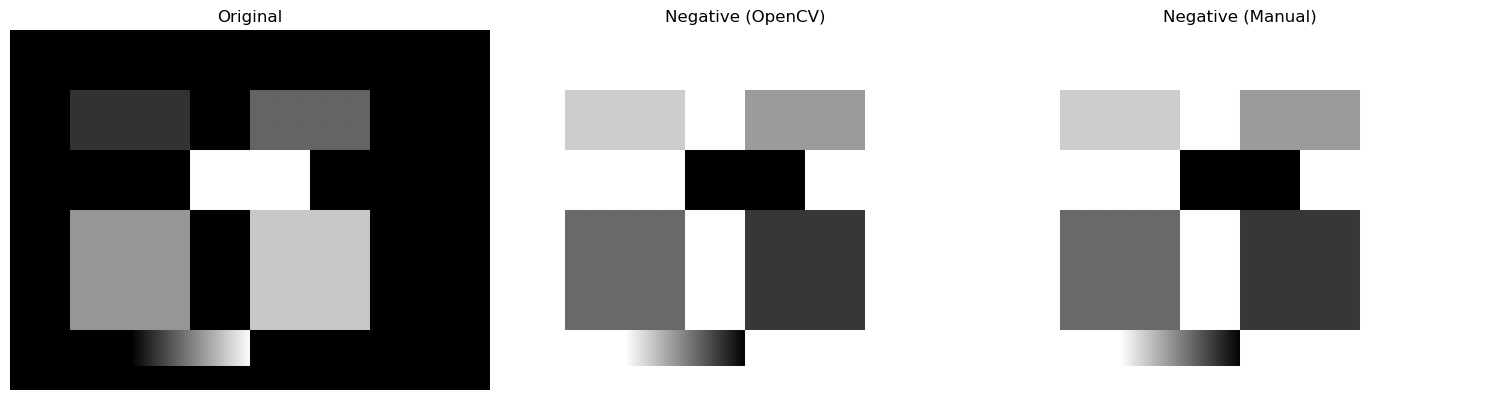

Both methods identical: True


In [16]:
# Method 1: Using OpenCV
negative_cv = cv2.bitwise_not(image)

# Method 2: Manual implementation
negative_manual = 255 - image

# Display results
display_images([image, negative_cv, negative_manual], 
               ['Original', 'Negative (OpenCV)', 'Negative (Manual)'],
               figsize=(15, 5))

# Verify both methods produce identical results
print(f"Both methods identical: {np.array_equal(negative_cv, negative_manual)}")

## 2️⃣ Log Transformation

**Purpose:** Enhances dark regions and compresses dynamic range

**Formula:** $s = c \cdot \log(1 + r)$

- Expands low intensity values
- Compresses high intensity values
- Useful for visualizing Fourier spectra

C:\Users\sanat\AppData\Local\Temp\ipykernel_195260\3102084911.py:3: RuntimeWarning: overflow encountered in scalar add
  c = 255 / np.log(1 + np.max(image))
C:\Users\sanat\AppData\Local\Temp\ipykernel_195260\3102084911.py:3: RuntimeWarning: divide by zero encountered in log
  c = 255 / np.log(1 + np.max(image))


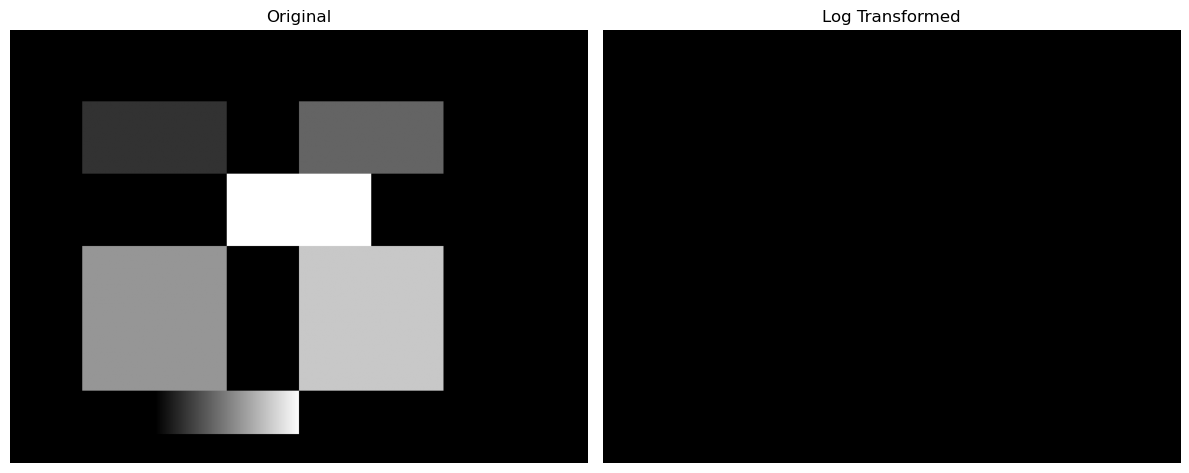

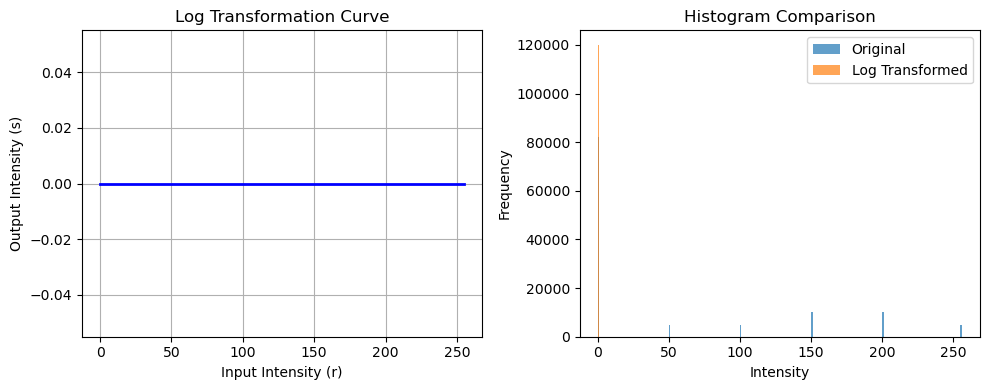

In [17]:
# Apply log transformation
# Constant c scales the output to [0, 255]
c = 255 / np.log(1 + np.max(image))
log_transformed = c * np.log(1 + image.astype(np.float32))
log_transformed = np.uint8(log_transformed)

# Display comparison
display_images([image, log_transformed], 
               ['Original', 'Log Transformed'],
               figsize=(12, 5))

# Plot transformation curve
x = np.arange(0, 256)
y = c * np.log(1 + x)

plt.figure(figsize=(10, 4))
plt.subplot(1, 2, 1)
plt.plot(x, y, 'b-', linewidth=2)
plt.xlabel('Input Intensity (r)')
plt.ylabel('Output Intensity (s)')
plt.title('Log Transformation Curve')
plt.grid(True)

plt.subplot(1, 2, 2)
plt.hist(image.ravel(), bins=256, range=(0, 256), alpha=0.7, label='Original')
plt.hist(log_transformed.ravel(), bins=256, range=(0, 256), alpha=0.7, label='Log Transformed')
plt.xlabel('Intensity')
plt.ylabel('Frequency')
plt.title('Histogram Comparison')
plt.legend()
plt.tight_layout()
plt.show()

## 3️⃣ Gamma Correction (Power Law Transformation)

**Purpose:** Display correction and brightness adjustment

**Formula:** $s = c \cdot r^\gamma$

- $\gamma < 1$: Brightens image (expands dark regions)
- $\gamma = 1$: No change (identity transformation)
- $\gamma > 1$: Darkens image (expands bright regions)

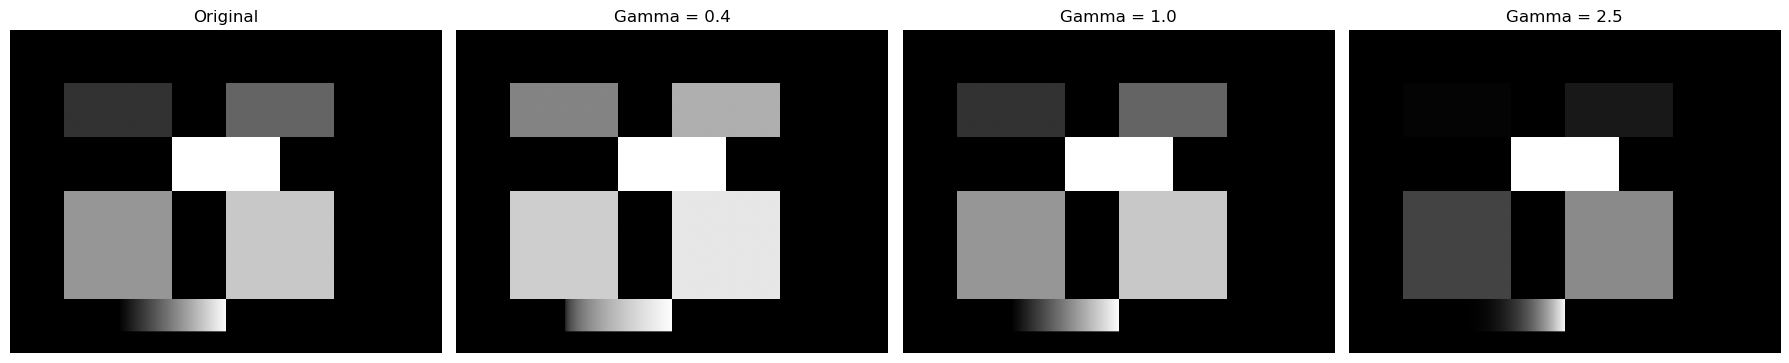

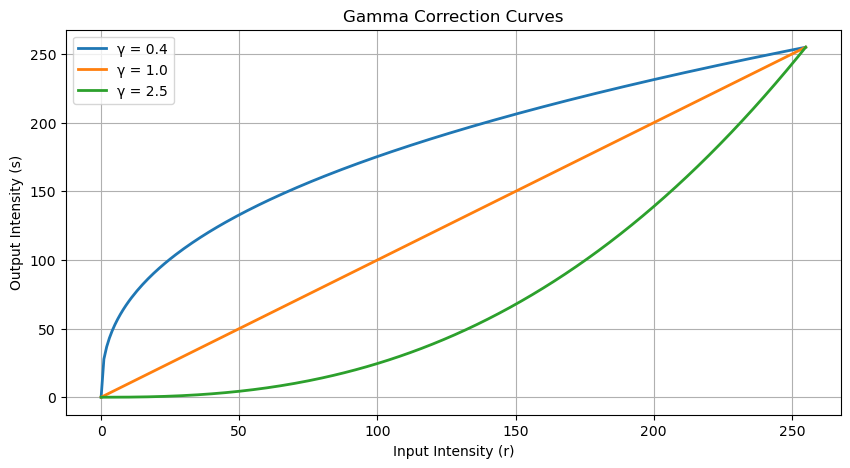

In [18]:
# Normalize image to [0, 1]
normalized = image / 255.0

# Apply different gamma values
gamma_values = [0.4, 1.0, 2.5]
gamma_images = []

for gamma in gamma_values:
    corrected = np.power(normalized, gamma)
    corrected = np.uint8(corrected * 255)
    gamma_images.append(corrected)

# Display results
titles = [f'Gamma = {g}' for g in gamma_values]
display_images([image] + gamma_images, 
               ['Original'] + titles,
               figsize=(18, 5))

# Plot gamma curves
plt.figure(figsize=(10, 5))
x = np.linspace(0, 1, 256)
for gamma in [0.4, 1.0, 2.5]:
    y = np.power(x, gamma)
    plt.plot(x * 255, y * 255, label=f'γ = {gamma}', linewidth=2)

plt.xlabel('Input Intensity (r)')
plt.ylabel('Output Intensity (s)')
plt.title('Gamma Correction Curves')
plt.legend()
plt.grid(True)
plt.show()

## 4️⃣ Contrast Stretching

**Purpose:** Expands intensity range to improve low contrast images

**Formula:** Piecewise linear transformation that maps $[r_{min}, r_{max}]$ to $[0, 255]$

$$s = \frac{(r - r_{min}) \cdot 255}{r_{max} - r_{min}}$$

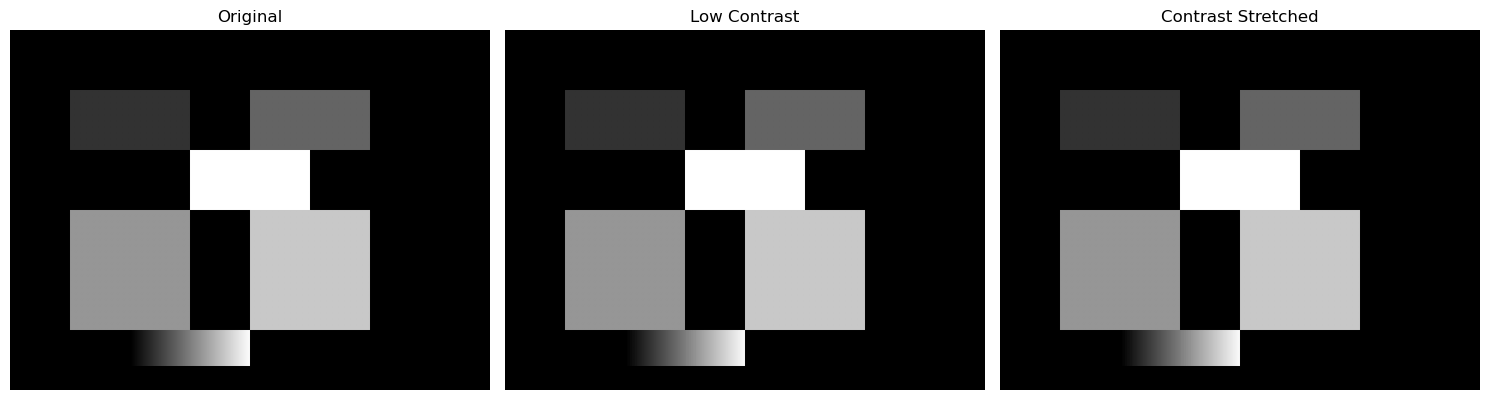

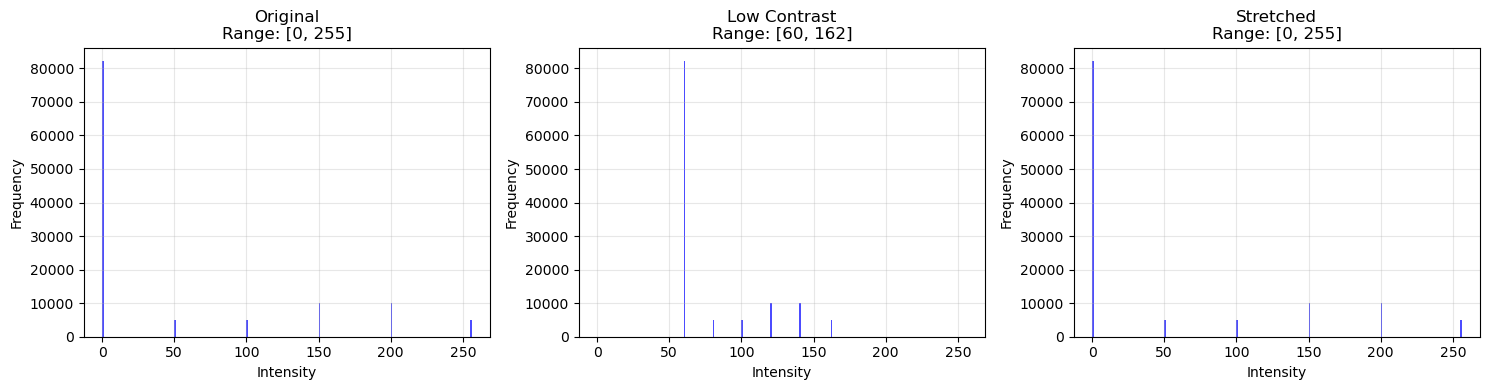

In [19]:
# Create a low contrast image
low_contrast = np.clip(image * 0.4 + 60, 0, 255).astype(np.uint8)

# Method 1: Using OpenCV normalize
stretched_cv = cv2.normalize(low_contrast, None, 0, 255, cv2.NORM_MINMAX)

# Method 2: Manual implementation
r_min = low_contrast.min()
r_max = low_contrast.max()
stretched_manual = ((low_contrast - r_min) * 255) / (r_max - r_min)
stretched_manual = np.uint8(stretched_manual)

# Display results
display_images([image, low_contrast, stretched_cv], 
               ['Original', 'Low Contrast', 'Contrast Stretched'],
               figsize=(15, 5))

# Show histograms
fig, axes = plt.subplots(1, 3, figsize=(15, 4))
images_hist = [image, low_contrast, stretched_cv]
titles_hist = ['Original', 'Low Contrast', 'Stretched']

for ax, img, title in zip(axes, images_hist, titles_hist):
    ax.hist(img.ravel(), bins=256, range=(0, 256), color='blue', alpha=0.7)
    ax.set_xlabel('Intensity')
    ax.set_ylabel('Frequency')
    ax.set_title(f'{title}\nRange: [{img.min()}, {img.max()}]')
    ax.grid(True, alpha=0.3)

plt.tight_layout()
plt.show()

## 5️⃣ Thresholding

**Purpose:** Converts grayscale image to binary (segmentation)

**Formula:** 
$$s = \begin{cases} 
255 & \text{if } r > T \\
0 & \text{if } r \leq T
\end{cases}$$

where $T$ is the threshold value.

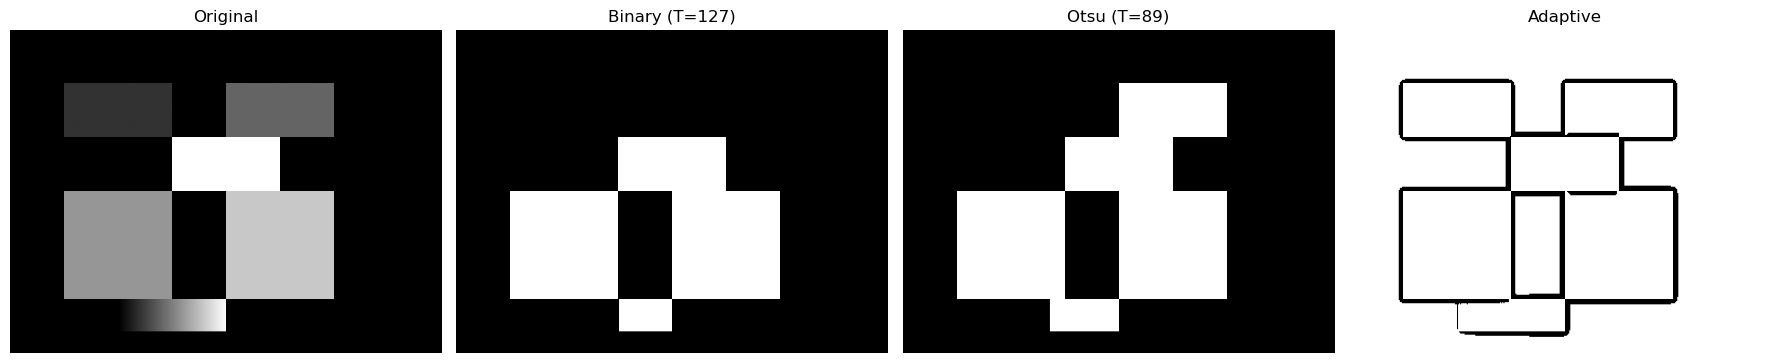

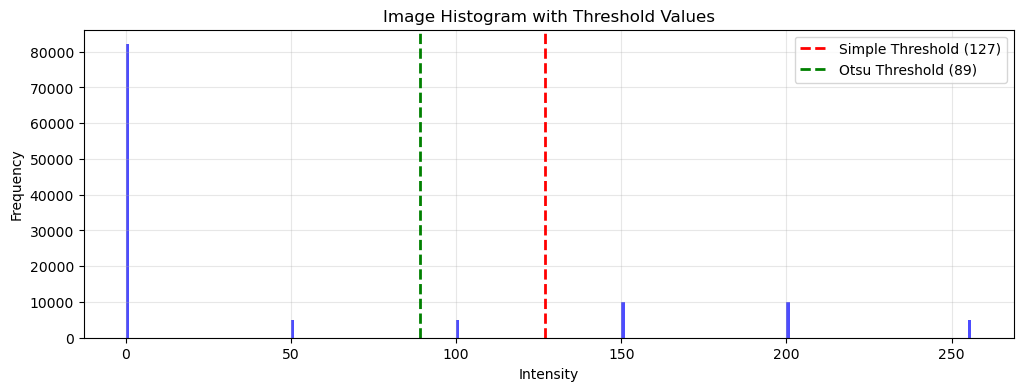

Otsu's optimal threshold: 89.00


In [20]:
# Apply different thresholding techniques using OpenCV

# 1. Simple Binary Threshold
_, binary_simple = cv2.threshold(image, 127, 255, cv2.THRESH_BINARY)

# 2. Otsu's Automatic Threshold (finds optimal threshold automatically)
otsu_thresh, binary_otsu = cv2.threshold(image, 0, 255, cv2.THRESH_BINARY + cv2.THRESH_OTSU)

# 3. Adaptive Threshold (locally adaptive)
binary_adaptive = cv2.adaptiveThreshold(image, 255, cv2.ADAPTIVE_THRESH_GAUSSIAN_C, 
                                         cv2.THRESH_BINARY, 11, 2)

# Display results
display_images([image, binary_simple, binary_otsu, binary_adaptive], 
               ['Original', f'Binary (T=127)', f'Otsu (T={otsu_thresh:.0f})', 'Adaptive'],
               figsize=(18, 5))

# Show histogram with threshold lines
plt.figure(figsize=(12, 4))
plt.hist(image.ravel(), bins=256, range=(0, 256), color='blue', alpha=0.7)
plt.axvline(127, color='r', linestyle='--', linewidth=2, label='Simple Threshold (127)')
plt.axvline(otsu_thresh, color='g', linestyle='--', linewidth=2, label=f'Otsu Threshold ({otsu_thresh:.0f})')
plt.xlabel('Intensity')
plt.ylabel('Frequency')
plt.title('Image Histogram with Threshold Values')
plt.legend()
plt.grid(True, alpha=0.3)
plt.show()

print(f"Otsu's optimal threshold: {otsu_thresh:.2f}")

## 6️⃣ Histogram Equalization

**Purpose:** Improves global contrast by redistributing intensity values

**Method:** Uses cumulative distribution function (CDF) to create a more uniform histogram

- Very common technique (important for exams!)
- Works best on images with poor contrast
- OpenCV provides `cv2.equalizeHist()`

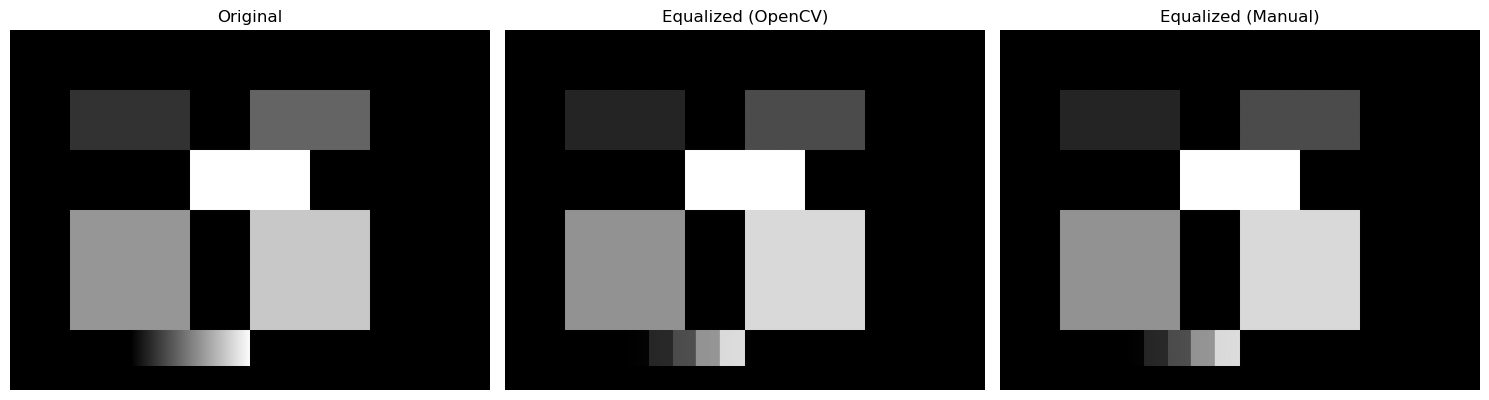

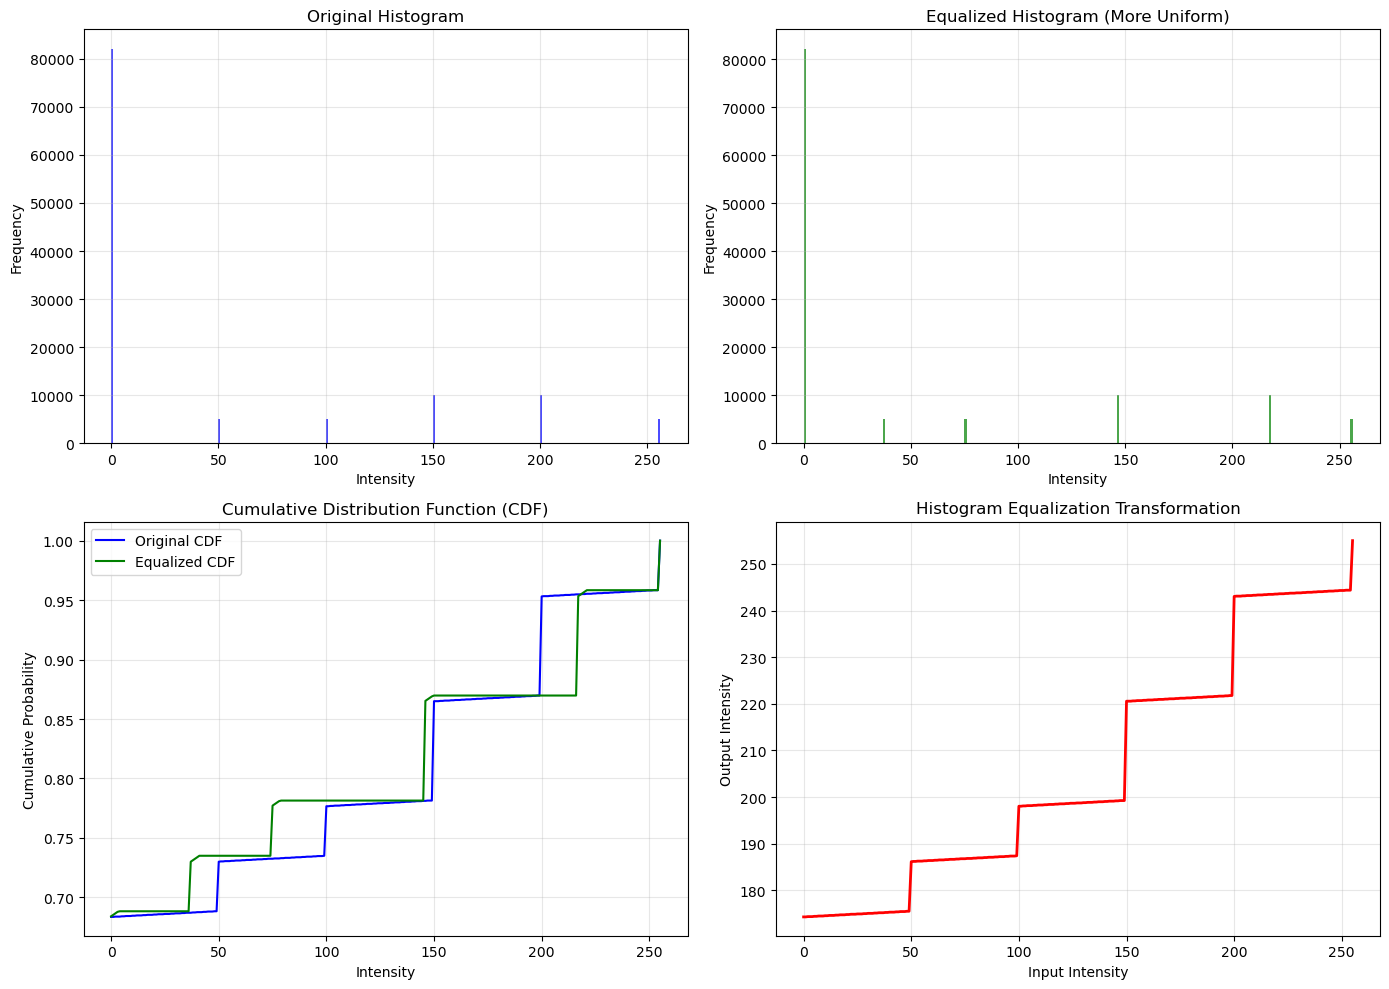

OpenCV and Manual methods identical: False


In [21]:
# Apply histogram equalization using OpenCV
equalized = cv2.equalizeHist(image)

# Manual implementation for understanding
def manual_histogram_equalization(img):
    # Calculate histogram
    hist, bins = np.histogram(img.flatten(), 256, [0, 256])
    
    # Calculate cumulative distribution function (CDF)
    cdf = hist.cumsum()
    
    # Normalize CDF to range [0, 255]
    cdf_normalized = (cdf - cdf.min()) * 255 / (cdf.max() - cdf.min())
    cdf_normalized = cdf_normalized.astype('uint8')
    
    # Map the intensity values using CDF
    equalized_manual = cdf_normalized[img]
    return equalized_manual, hist, cdf

equalized_manual, original_hist, cdf = manual_histogram_equalization(image)

# Display image comparison
display_images([image, equalized, equalized_manual], 
               ['Original', 'Equalized (OpenCV)', 'Equalized (Manual)'],
               figsize=(15, 5))

# Display histograms and CDF
fig, axes = plt.subplots(2, 2, figsize=(14, 10))

# Original histogram
axes[0, 0].hist(image.ravel(), bins=256, range=(0, 256), color='blue', alpha=0.7)
axes[0, 0].set_title('Original Histogram')
axes[0, 0].set_xlabel('Intensity')
axes[0, 0].set_ylabel('Frequency')
axes[0, 0].grid(True, alpha=0.3)

# Equalized histogram
axes[0, 1].hist(equalized.ravel(), bins=256, range=(0, 256), color='green', alpha=0.7)
axes[0, 1].set_title('Equalized Histogram (More Uniform)')
axes[0, 1].set_xlabel('Intensity')
axes[0, 1].set_ylabel('Frequency')
axes[0, 1].grid(True, alpha=0.3)

# CDF comparison
hist_eq, _ = np.histogram(equalized.flatten(), 256, [0, 256])
cdf_original = original_hist.cumsum()
cdf_equalized = hist_eq.cumsum()

axes[1, 0].plot(cdf_original / cdf_original.max(), 'b-', label='Original CDF')
axes[1, 0].plot(cdf_equalized / cdf_equalized.max(), 'g-', label='Equalized CDF')
axes[1, 0].set_title('Cumulative Distribution Function (CDF)')
axes[1, 0].set_xlabel('Intensity')
axes[1, 0].set_ylabel('Cumulative Probability')
axes[1, 0].legend()
axes[1, 0].grid(True, alpha=0.3)

# Transformation function
axes[1, 1].plot(cdf / cdf.max() * 255, 'r-', linewidth=2)
axes[1, 1].set_title('Histogram Equalization Transformation')
axes[1, 1].set_xlabel('Input Intensity')
axes[1, 1].set_ylabel('Output Intensity')
axes[1, 1].grid(True, alpha=0.3)

plt.tight_layout()
plt.show()

print(f"OpenCV and Manual methods identical: {np.array_equal(equalized, equalized_manual)}")

## Summary

| Algorithm | Formula | OpenCV Function | Use Case |
|-----------|---------|-----------------|----------|
| **Image Negative** | $s = 255 - r$ | `cv2.bitwise_not()` | Medical/X-ray imaging |
| **Log Transform** | $s = c \cdot \log(1 + r)$ | Manual implementation | Enhance dark regions |
| **Gamma Correction** | $s = c \cdot r^\gamma$ | Manual implementation | Display correction |
| **Contrast Stretching** | Linear mapping | `cv2.normalize()` | Improve low contrast |
| **Thresholding** | Binary mapping | `cv2.threshold()` | Segmentation |
| **Histogram Equalization** | CDF mapping | `cv2.equalizeHist()` | Global contrast improvement |

